In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [3]:
callsets = load_callsets(COMBINED_CALLSET_FN_TEMPLATE, 
                         variant_filter='FILTER_PASS',
                         call_filter=combined_conf_calls,
                         sample_exclusions=excessive_recomb_samples)

2015-05-07 17:02:20.721368 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/3d7_hb3.combined.final.npz
2015-05-07 17:02:21.000921 :: filter variants: excluding 157 (0.4%) retaining 42087 (99.6%) of 42244 variants
2015-05-07 17:02:21.072987 :: filter calls: excluding 2439 (0.3%) retaining 881388 (99.7%) of 883827 calls
2015-05-07 17:02:21.074362 :: loading /data/plasmodium/pfalciparum/pf-crosses/data/public/20141022/hb3_dd2.combined.final.npz
2015-05-07 17:02:21.417062 :: filter variants: excluding 450 (1.2%) retaining 36461 (98.8%) of 36911 variants
2015-05-07 17:02:21.441237 :: filter samples: excluding ['SC01/PG0025-C/ERR019045'] including ['HB3/PG0004-CW/ERR012788', 'DD2/PG0008-CW/ERR012840', '1BB5/PG0023-C/ERR015449', '3BA6/PG0022-Cx/ERR126027', '3BD5/PG0024-C/ERR019053', '7C101/PG0074-C/ERR019048', '7C111/PG0038-C/ERR015457', '7C12/PG0035-Cx/ERR037704', '7C126/PG0047-C/ERR015452', '7C140/PG0039-C/ERR015454', '7C159/PG0040-Cx/ERR107475', '7C16/PG0036-C/ERR015

In [2]:
tbl_conversion_tracts = etl.frompickle(os.path.join(PUBLIC_DIR, 'tbl_conversion_tracts.pickle'))
tbl_conversion_tracts.gt('tract_length_min', 15000)

0|sample,1|cross,2|chrom,3|tract_start_min,4|tract_start_mid,5|tract_start_max,6|tract_stop_min,7|tract_stop_mid,8|tract_stop_max,9|tract_length_min,10|tract_length_mid,11|tract_length_max,12|tract_support,13|tract_is_complex,14|tract_blocks,15|co_pos_mid,16|co_pos_min,17|co_pos_max,18|co_pos_range,19|tract_type
3BD5/PG0024-C/ERR019053,hb3_dd2,b'Pf3D7_10_v3',1308754,1309392,1310031,1330511,1330807,1331104,20480,21415,22350,39,True,3,None,None,None,None,NCO
3BD5/PG0024-C/ERR019053,hb3_dd2,b'Pf3D7_10_v3',1341344,1342132,1342921,1361560,1361995,1362430,18639,19863,21086,32,True,6,1351887,1341344,1362430,21086,CO
7C3/PG0034-C/ERR019047,hb3_dd2,b'Pf3D7_08_v3',1202631,1203122,1203613,1227264,1227421,1227578,23651,24299,24947,44,True,5,None,None,None,None,NCO
C04/PG0061-C/ERR019059,3d7_hb3,b'Pf3D7_14_v3',2891817,2892879,2893941,2922794,2923016,2923239,28853,30137,31422,77,True,9,None,None,None,None,NCO
JC3/PG0077-CW/ERR045636,7g8_gb4,b'Pf3D7_08_v3',1207822,1208720,1209619,1228966,1229286,1229606,19347,20566,21784,42,True,10,1218714,1207822,1229606,21784,CO


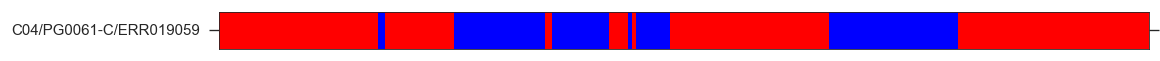

In [4]:
fig = plt.figure(figsize=(10, .4))
plot_inheritance(plt.gca(), callsets['3d7_hb3'], 'Pf3D7_14_v3', start=2870000, stop=2990000, sample_indices=[9])

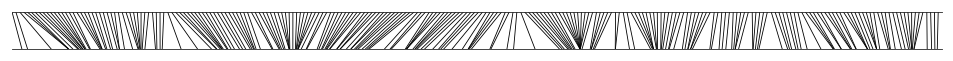

In [5]:
fig = plt.figure(figsize=(10, .4))
plot_variants_locator(plt.gca(), callsets['3d7_hb3'], 'Pf3D7_14_v3', start=2870000, stop=2990000, step=1)

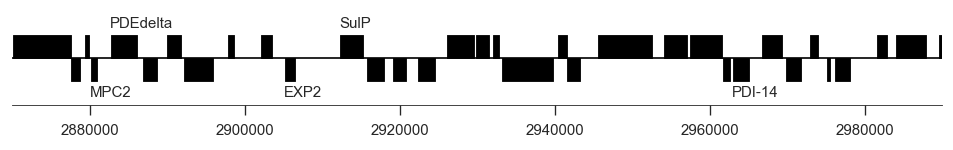

In [6]:
fig = plt.figure(figsize=(10, 1))
plot_genes(plt.gca(), 'Pf3D7_14_v3', start=2870000, stop=2990000, label_named=True, width=.25, label_ytextpad=0.05)

In [11]:
def fig_recom(cross, sample_indices, chrom, start=0, stop=None, 
              figsize=(8, 3), height_ratios=[2, 1, 2], title=None, filename=None):
    fig = plt.figure(figsize=figsize)
    if title is not None:
        fig.suptitle(title, fontsize=10, fontweight='bold')
    gs = GridSpec(3, 1, height_ratios=height_ratios)
    
    ax = fig.add_subplot(gs[0])
    plot_inheritance(ax, callsets[cross], chrom, start=start, stop=stop, sample_indices=sample_indices, alpha=1)
    ax.xaxis.tick_top()
    ax.set_xlabel('variants')
    ax.xaxis.set_label_position('top')
    for i in range(len(sample_indices)):
        ax.axhline(i, color='k', alpha=.6, linewidth=.5)
    
    ax = fig.add_subplot(gs[1])
    plot_variants_locator(ax, callsets[cross], chrom, start=start, stop=stop, step=1)
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_ylabel('variant location', rotation=0, ha='right', va='center')
    
    ax = fig.add_subplot(gs[2])
    plot_genes(ax, chrom, start=start, stop=stop, label_named=True, width=.25, label_ytextpad=.05)
    ax.set_xlabel('chromosome %s position (bp)' % chrom)
    ax.set_ylabel('genes', rotation=0, ha='right', va='center')
    
    fig.tight_layout()
    return fig


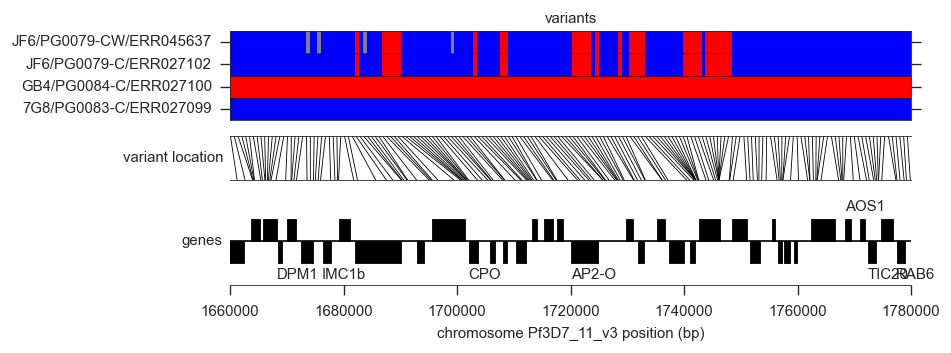

In [19]:
cross = '7g8_gb4'
sample_indices = [0, 1, 14, 15]
chrom = 'Pf3D7_11_v3' 
start=1660000
stop=1780000
fig = fig_recom(cross, sample_indices, chrom, start, stop)
fn = '../../artwork/supp/complex_tract_jf6.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)

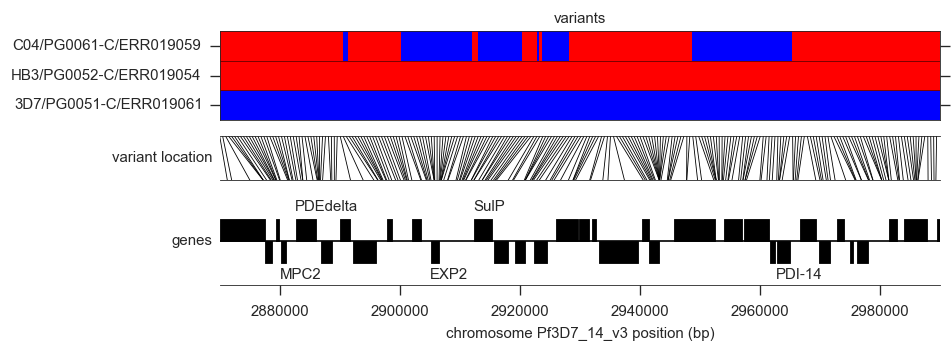

In [20]:
cross = '3d7_hb3'
sample_indices = [0, 1, 9]
chrom = 'Pf3D7_14_v3'
start=2870000
stop=2990000
fig = fig_recom(cross, sample_indices, chrom, start, stop)
fn = '../../artwork/supp/complex_tract_c04.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)

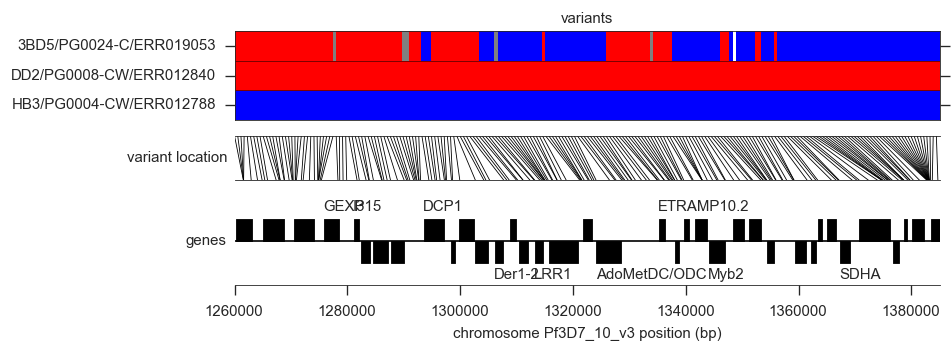

In [21]:
cross = 'hb3_dd2'
sample_indices = [0, 1, 4]
chrom = 'Pf3D7_10_v3'
start=1260000
stop=1385000
fig = fig_recom(cross, sample_indices, chrom, start, stop)
fn = '../../artwork/supp/complex_tract_3bd5.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)